In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [2]:
le = LabelEncoder()
ohe = OneHotEncoder()
mms = MinMaxScaler()
std = StandardScaler()

In [3]:
data = pd.read_csv('datasets/data.csv')

In [4]:
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [5]:
data.drop(['Unnamed: 32' ,'id'] ,axis=1 ,inplace=True)

In [6]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
ol = OrdinalEncoder(categories=[['M' ,'B']])
data['diagnosis']  =ol.fit_transform(data[['diagnosis']])

In [8]:
data.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,0.0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,0.0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,0.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,0.0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,0.0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [9]:
data.shape

(569, 31)

In [10]:
np.round(data.describe(),2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.63,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,1.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [11]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [13]:
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
# sns.pairplot(data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'diagnosis'),
  Text(1, 0, 'radius_mean'),
  Text(2, 0, 'texture_mean'),
  Text(3, 0, 'perimeter_mean'),
  Text(4, 0, 'area_mean'),
  Text(5, 0, 'smoothness_mean'),
  Text(6, 0, 'compactness_mean'),
  Text(7, 0, 'concavity_mean'),
  Text(8, 0, 'concave points_mean'),
  Text(9, 0, 'symmetry_mean'),
  Text(10, 0, 'fractal_dimension_mean'),
  Text(11, 0, 'radius_se'),
  Text(12, 0, 'texture_se'),
  Text(13, 0, 'perimeter_se'),
  Text(14, 0, 'area_se'),
  Text(15, 0, 'smoothness_se'),
  Text(16, 0, 'compactness_se'),
  Text(17, 0, 'concavity_se'),
  Text(18, 0, 'concave points_se'),
  Text(19, 0, 'symmetry_se'),
  Text(20, 0, 'fractal_dimension_se'),
  Text(21, 0, 'radius_worst'),
  Text(22, 0, 'texture_worst'),
  Text(23, 0, 'perimeter_worst'),
  Text(24, 0, 'area_worst'),
  Text(25, 0, 'smoothness_wor

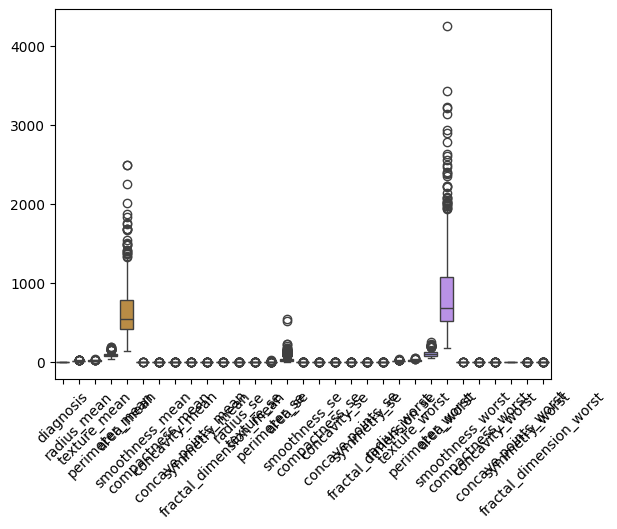

In [15]:
sns.boxplot(data)
plt.xticks(rotation =45)

<Axes: ylabel='Count'>

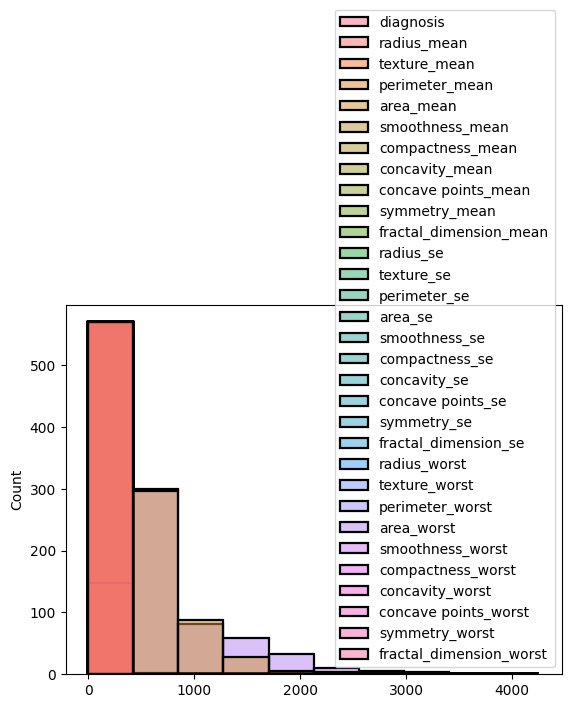

In [16]:
sns.histplot(data=data , bins=10 , linewidth=1.6 , color='red')

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5]),
 [Text(0.5, 0, 'diagnosis'),
  Text(2.5, 0, 'texture_mean'),
  Text(4.5, 0, 'area_mean'),
  Text(6.5, 0, 'compactness_mean'),
  Text(8.5, 0, 'concave points_mean'),
  Text(10.5, 0, 'fractal_dimension_mean'),
  Text(12.5, 0, 'texture_se'),
  Text(14.5, 0, 'area_se'),
  Text(16.5, 0, 'compactness_se'),
  Text(18.5, 0, 'concave points_se'),
  Text(20.5, 0, 'fractal_dimension_se'),
  Text(22.5, 0, 'texture_worst'),
  Text(24.5, 0, 'area_worst'),
  Text(26.5, 0, 'compactness_worst'),
  Text(28.5, 0, 'concave points_worst'),
  Text(30.5, 0, 'fractal_dimension_worst')])

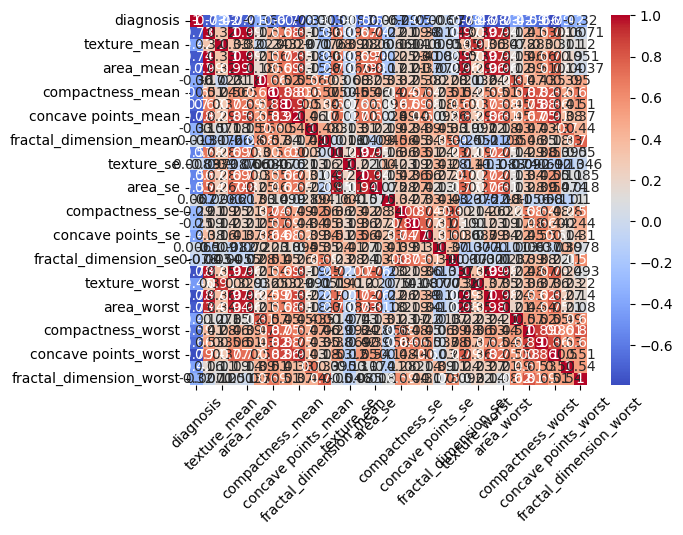

In [19]:
sns.heatmap(data.corr(), cmap='coolwarm' ,annot= True)
plt.xticks(rotation= 45)

<Axes: xlabel='area_mean', ylabel='area_se'>

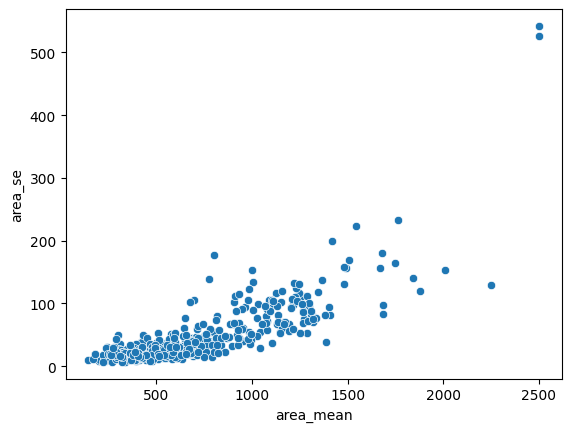

In [18]:
sns.scatterplot(x= data['area_mean']  , y =data['area_se'])

In [20]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
x = data.drop('diagnosis' ,axis=1)
y = data['diagnosis']

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=43)

In [47]:
x_train_trans = mms.fit_transform(x_train)
x_test_trans = mms.fit_transform(x_test)
x_train_df = pd.DataFrame(data=x_train_trans , columns=x_train.columns)
x_test_df = pd.DataFrame(data= x_test_trans , columns=x_test.columns)
x_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.232335,0.387555,0.225278,0.123139,0.407150,0.179401,0.059864,0.108300,0.454885,0.272536,...,0.182142,0.404851,0.172718,0.082997,0.471703,0.185707,0.099487,0.283952,0.297654,0.121147
1,0.594870,0.644572,0.620621,0.451113,0.360838,0.567959,0.417994,0.568588,0.387613,0.260320,...,0.609036,0.646322,0.638428,0.427841,0.375949,0.490545,0.363333,0.667010,0.246994,0.298177
2,0.217190,0.315522,0.210144,0.112916,0.296380,0.167039,0.128515,0.070974,0.461292,0.267692,...,0.182853,0.398721,0.179391,0.082408,0.354817,0.161452,0.218803,0.229003,0.289769,0.182343
3,0.357281,0.325668,0.348697,0.218961,0.282116,0.169462,0.206584,0.145378,0.163374,0.157961,...,0.297759,0.436301,0.287315,0.158597,0.249158,0.230530,0.322991,0.329691,0.178593,0.128493
4,0.280610,0.223876,0.267708,0.158176,0.241762,0.093863,0.090745,0.118141,0.353444,0.141323,...,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.150769,0.282990,0.287601,0.094779


In [102]:
sel = SelectKBest(score_func=chi2 , k=5 )
sel.fit_transform(x_train,y_train)
mask = sel.get_support()
final = x_train_df.columns[mask]

In [103]:
final

Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')

In [104]:
X_train = x_train_df[['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst']]
X_test = x_test_df[['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst']]

In [105]:
lor = LogisticRegression()
lor.fit(X_train , y_train)
y_pred = lor.predict(X_test)

In [106]:
accuracy_score(y_test ,y_pred)

0.9210526315789473

In [107]:
classification_report(y_test ,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.95      0.89        39\n         1.0       0.97      0.91      0.94        75\n\n    accuracy                           0.92       114\n   macro avg       0.91      0.93      0.91       114\nweighted avg       0.93      0.92      0.92       114\n'

In [108]:
mean_absolute_error(y_test , y_pred)

0.07894736842105263

In [109]:
f1_score(y_test ,y_pred)

0.9379310344827586

In [110]:
recall_score(y_test , y_pred)

0.9066666666666666

In [111]:
precision_score(y_test , y_pred)

0.9714285714285714

In [112]:
roc_auc_score(y_test , y_pred)

0.9276923076923076